In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("daily-website-visitors.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [8]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [10]:
from datetime import datetime

In [11]:
data["Date"] = pd.to_datetime(data["Date"])

In [19]:
data["Unique.Visits"]= data["Unique.Visits"].apply(lambda X : int(X.replace(",","")))

<AxesSubplot:xlabel='Day', ylabel='Unique.Visits'>

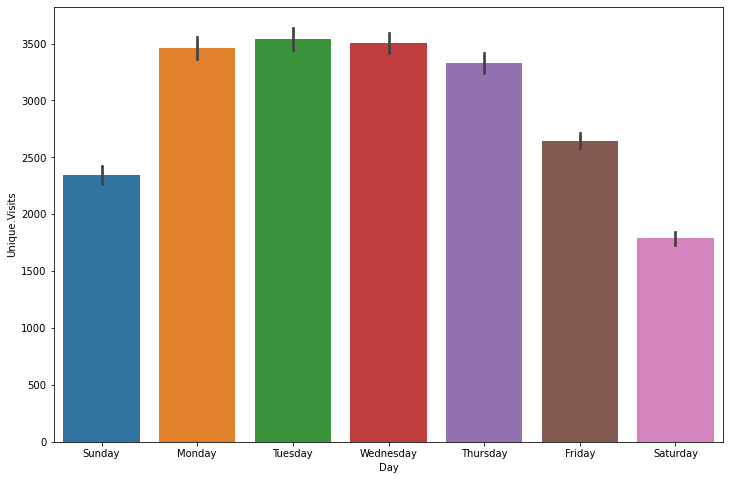

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(x = "Day",y = "Unique.Visits",data = data)

In [32]:
data["Date"].dt.year.value_counts().sort_values()

2014    109
2020    232
2015    365
2017    365
2018    365
2019    365
2016    366
Name: Date, dtype: int64

In [31]:
data[data["Date"].dt.year == 2020]

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
1935,1936,Wednesday,4,2020-01-01,"1,554",1105,870,235
1936,1937,Thursday,5,2020-01-02,"2,820",2083,"1,754",329
1937,1938,Friday,6,2020-01-03,"2,970",2180,"1,859",321
1938,1939,Saturday,7,2020-01-04,"2,111",1526,"1,300",226
1939,1940,Sunday,1,2020-01-05,"2,393",1788,"1,514",274
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,2020-08-15,"2,221",1696,"1,373",323
2163,2164,Sunday,1,2020-08-16,"2,724",2037,"1,686",351
2164,2165,Monday,2,2020-08-17,"3,456",2638,"2,181",457
2165,2166,Tuesday,3,2020-08-18,"3,581",2683,"2,184",499


In [39]:
data[data.duplicated()==True]

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits


In [41]:
data.shape

(2167, 8)

In [43]:
df = data[["Date","Unique.Visits"]]

In [44]:
df

,Date,Unique.Visits
0,2014-09-14,1582
1,2014-09-15,2528
2,2014-09-16,2630
3,2014-09-17,2614
4,2014-09-18,2366
...,...,...
2162,2020-08-15,1696
2163,2020-08-16,2037
2164,2020-08-17,2638
2165,2020-08-18,2683


In [45]:
df.set_index("Date",drop = True)

,Unique.Visits
Date,
2014-09-14,1582
2014-09-15,2528
2014-09-16,2630
2014-09-17,2614
2014-09-18,2366
...,...
2020-08-15,1696
2020-08-16,2037
2020-08-17,2638


Text(0.5, 1.0, 'Date vs Unique.Visits')

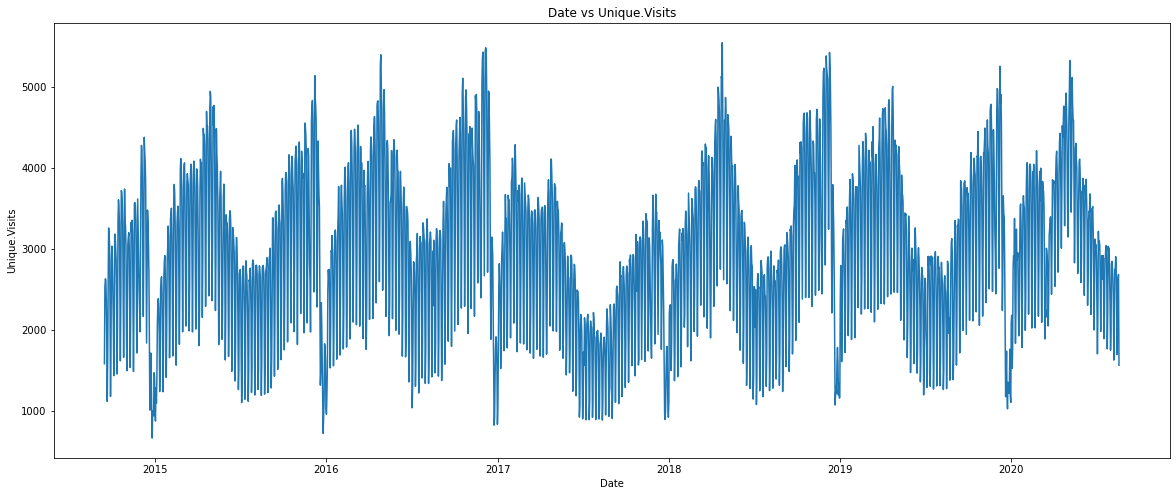

In [59]:
plt.figure(figsize = (20,8))
plt.plot(data["Date"],data["Unique.Visits"])
plt.xlabel("Date")
plt.ylabel("Unique.Visits")
plt.title("Date vs Unique.Visits")

In [60]:
#dickey fuller test 

In [61]:
from statsmodels.tsa.stattools import adfuller

In [63]:
res_adful = adfuller(df["Unique.Visits"],autolag = "AIC")

In [64]:
res_adful 

(-4.475968574445404,
 0.0002172640930008023,
 26,
 2140,
 {'1%': -3.4334094211542983,
  '5%': -2.8628915360971003,
  '10%': -2.5674894918770197},
 29336.11247026125)

In [67]:
print(f"statistic_value = {res_adful[0]}")
print(f"p-value = {res_adful[1]}")
print(f"lag_used = {res_adful[2]}")
print(f"number_of_observations = {res_adful[3]}")
for key,value in res_adful[4].items():
    print("Critical value for %s = %f" % (key,value))

statistic_value = -4.475968574445404
p-value = 0.0002172640930008023
lag_used = 26
number_of_observations = 2140
Critical value for 1% = -3.433409
Critical value for 5% = -2.862892
Critical value for 10% = -2.567489


If the test statistic is more negative than the critical values for a chosen significance level (e.g., 1%, 5%), you have evidence to reject the null hypothesis of non-stationarity.
In your case, the test statistic (-4.475968574445404) is significantly more negative than all three critical values (-3.433409, -2.862892, -2.567489).
Therefore, based on this result, you can infer that your time series is likely stationary. The degree of negativity of the test statistic indicates the strength of this inference, and in your case, it's quite strong.

In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Text(0, 0.5, 'correlation')

<Figure size 1080x576 with 0 Axes>

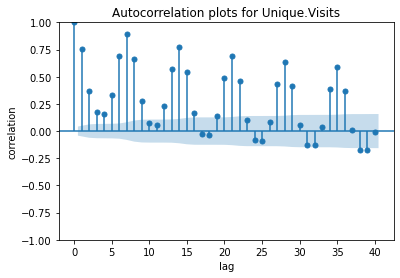

In [72]:
plt.figure(figsize = (15,8))
plot_acf(df["Unique.Visits"],lags = 40,title = "Autocorrelation plots for Unique.Visits")
plt.xlabel("lag")
plt.ylabel("correlation")

Text(0, 0.5, 'correlation')

<Figure size 1080x576 with 0 Axes>

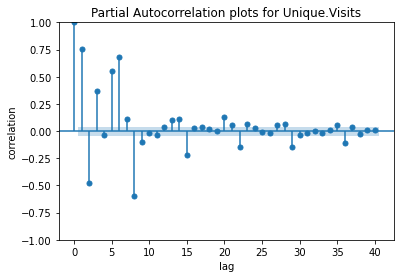

In [73]:
plt.figure(figsize = (15,8))
plot_pacf(df["Unique.Visits"],lags = 40,title = "Partial Autocorrelation plots for Unique.Visits")
plt.xlabel("lag")
plt.ylabel("correlation")

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [92]:
decomposition= seasonal_decompose(df["Unique.Visits"],model = "additive",period = 30)

In [93]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

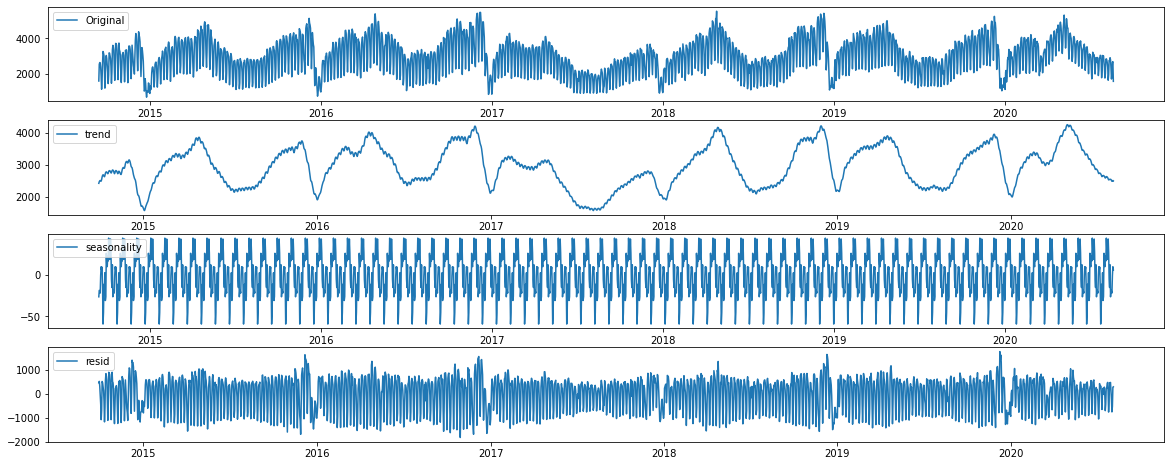

In [95]:
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.plot(data["Date"],df["Unique.Visits"],label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(data["Date"],trend,label = "trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(data["Date"],seasonality,label = "seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(data["Date"],residuals,label = "resid")
plt.legend(loc = "upper left")


def

KeyboardInterrupt: 

ValueError: Image size of 864x133488 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x133488 with 309 Axes>

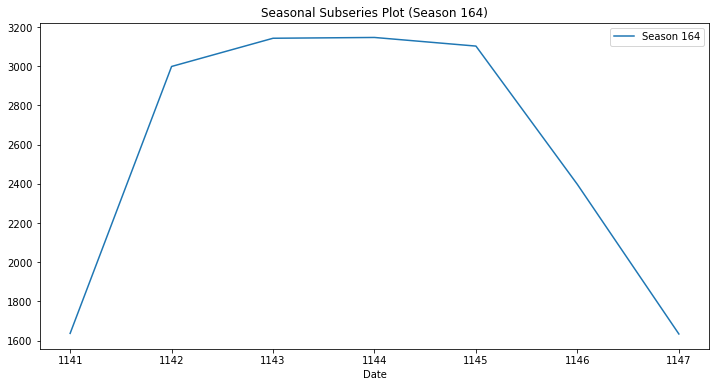

In [106]:
seasonality_period = 7

# Create seasonal subseries plots
def create_seasonal_subseries(ts, seasonality_period):
    # Get the number of seasons (periods) in the time series
    num_seasons = len(ts) // seasonality_period

    # Create subplots for each season
    fig, axes = plt.subplots(num_seasons, 1, figsize=(12, 6 * num_seasons), sharex=True)

    # Loop through each season and plot the corresponding data
    for i in range(num_seasons):
        season_data = ts[i * seasonality_period : (i + 1) * seasonality_period]
        plt.figure(figsize=(12, 6))  # Adjust figure size if needed
        plt.plot(season_data, label=f'Season {i + 1}')
        plt.title(f'Seasonal Subseries Plot (Season {i + 1})')
        plt.legend()
        plt.xlabel('Date')
        plt.tight_layout()
        plt.savefig(f'seasonal_subseries_season_{i + 1}.png')
        plt.close()  # Close the current figure to release resources
        
          
        
create_seasonal_subseries(df["Unique.Visits"],seasonality_period)        
            

In [107]:
import pmdarima as pm

In [108]:
train_size = int(0.8*len(df["Unique.Visits"]))

In [109]:
train = df["Unique.Visits"][:train_size]

In [110]:
test = df["Unique.Visits"][train_size:]

In [112]:
p_values = range(0,3)
d_values = range(0,2)
q_values = range(0,3)
seasonal_p_values = range(0,3)
seasonal_d_values = range(0,2)
seasonal_q_values = range(0,3)
best_mae = float("inf")
best_order = None
seasonality_period = 7
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in seasonal_p_values:
                for D in seasonal_d_values:
                    for Q in seasonal_q_values:
                        try:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, seasonality_period)
                            model = pm.ARIMA(order=order, seasonal_order=seasonal_order, suppress_warnings=True)
                            model.fit(train)
                            forecast = model.predict(n_periods=len(test))
                            mae = mean_squared_error(test,forecast)
                            if mae < best_mae:
                                best_mae = mae
                                best_order = order, seasonal_order
                        except Exception as e:
                            continue

print(f"Best SARIMA Parameters: {best_order}")
print(f"Best Mean Squared Error (MSE): {best_mae}")

KeyboardInterrupt: 